In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

In [3]:
data = pd.ExcelFile('demo_data.xls')
df = pd.read_excel(data, 1, header = 0)
x_train = df[['X1', 'X2']]
y_train = df[['y']]
df

,X1,X2,y
0,1,4.0,5
1,2,8.0,4
2,3,7.0,3
3,4,6.0,5
4,5,9.0,7
5,6,2.0,15
6,7,10.0,17
7,8,3.0,16
8,9,7.5,4
9,10,1.0,20


In [4]:
df.corr()

,X1,X2,y
X1,1.000000,-0.270679,0.681543
X2,-0.270679,1.000000,-0.482550
y,0.681543,-0.482550,1.000000


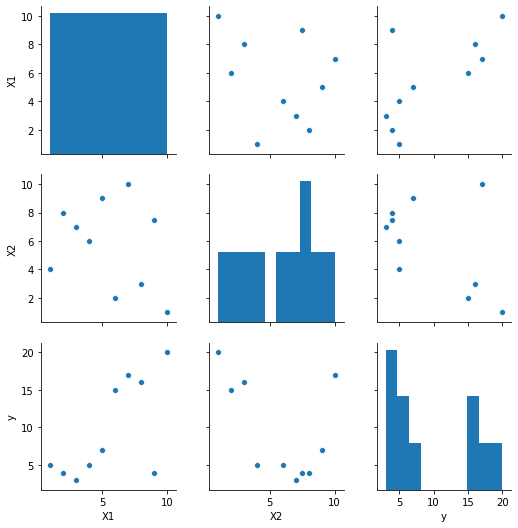

In [7]:
sns.pairplot(data = df, kind = 'scatter')
plt.show()

In [10]:
x_train = df[['X1', 'X2']]
x_train

,X1,X2
0,1,4.0
1,2,8.0
2,3,7.0
3,4,6.0
4,5,9.0
5,6,2.0
6,7,10.0
7,8,3.0
8,9,7.5
9,10,1.0


In [13]:
y_train = df[['y']]
y_train

,y
0,5
1,4
2,3
3,5
4,7
5,15
6,17
7,16
8,4
9,20


In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[6.44449706]
[[ 1.28988773 -0.68502253]]


In [16]:
y_predict = lr.predict(x_train)
print(y_predict)

[[ 4.99429466]
 [ 3.54409226]
 [ 5.51900252]
 [ 7.49391278]
 [ 6.72873291]
 [12.81377835]
 [ 8.62348583]
 [14.70853128]
 [12.91581761]
 [18.65835179]]


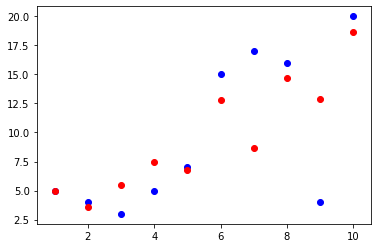

In [18]:
plt.scatter(x_train['X1'], y_train, color = 'blue')
plt.scatter(x_train['X1'], y_predict, color = 'red')

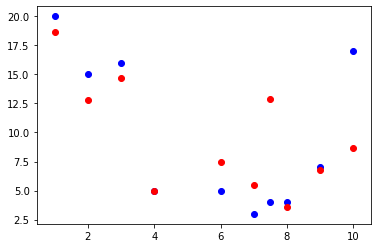

In [19]:
plt.scatter(x_train['X2'], y_train, color = 'blue')
plt.scatter(x_train['X2'], y_predict, color = 'red')

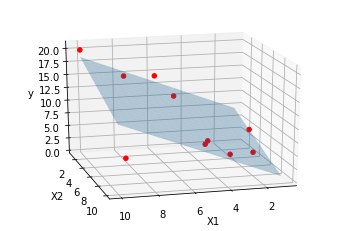

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x_grid = np.linspace(min(x_train['X1']), max(x_train['X2']), 20)
y_grid = np.linspace(min(x_train['X2']), max(x_train['X2']), 20)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
exog = pd.core.frame.DataFrame({'X1' : x_grid.ravel(), 'X2' : y_grid.ravel()})
out = lr.predict(exog)

ax.plot_surface(x_grid, y_grid, out.reshape(20, 20), rstride = 1, cstride = 1, alpha = 0.3)

ax.scatter(x_train['X1'], x_train['X2'], y_train, color = 'red', marker = 'o', alpha = 1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

ax.view_init(20, 75)
plt.show()

In [25]:
df.at[1, 'X2']

8.0

In [28]:
dfX1 = df[['X1']]
dfX1

,X1
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [30]:
dfX2 = df[['X2']]
dfX2

,X2
0,4.0
1,8.0
2,7.0
3,6.0
4,9.0
5,2.0
6,10.0
7,3.0
8,7.5
9,1.0


In [31]:
dfy = df[['y']]
dfy

,y
0,5
1,4
2,3
3,5
4,7
5,15
6,17
7,16
8,4
9,20


In [32]:
arr_X1 = dfX1.to_numpy()
arr_X1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [33]:
arr_X2 = dfX2.to_numpy()
arr_X2

array([[ 4. ],
       [ 8. ],
       [ 7. ],
       [ 6. ],
       [ 9. ],
       [ 2. ],
       [10. ],
       [ 3. ],
       [ 7.5],
       [ 1. ]])

In [36]:
arr_y = dfy.to_numpy()
arr_y.

(10, 1)

In [38]:
arr_X22 = np.full((10,1), 8.0)
arr_X22

array([[8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.]])

In [39]:
newdf = pd.DataFrame({'X1' : arr_X1[:,0], 'X2' : arr_X2[:,0], 'X22' : arr_X22[:,0], 'y' : arr_y[:, 0]})
newdf

,X1,X2,X22,y
0,1,4.0,8.0,5
1,2,8.0,8.0,4
2,3,7.0,8.0,3
3,4,6.0,8.0,5
4,5,9.0,8.0,7
5,6,2.0,8.0,15
6,7,10.0,8.0,17
7,8,3.0,8.0,16
8,9,7.5,8.0,4
9,10,1.0,8.0,20


In [40]:
newdf.corr()

,X1,X2,X22,y
X1,1.000000,-0.270679,NaN,0.681543
X2,-0.270679,1.000000,NaN,-0.482550
X22,NaN,NaN,NaN,NaN
y,0.681543,-0.482550,NaN,1.000000


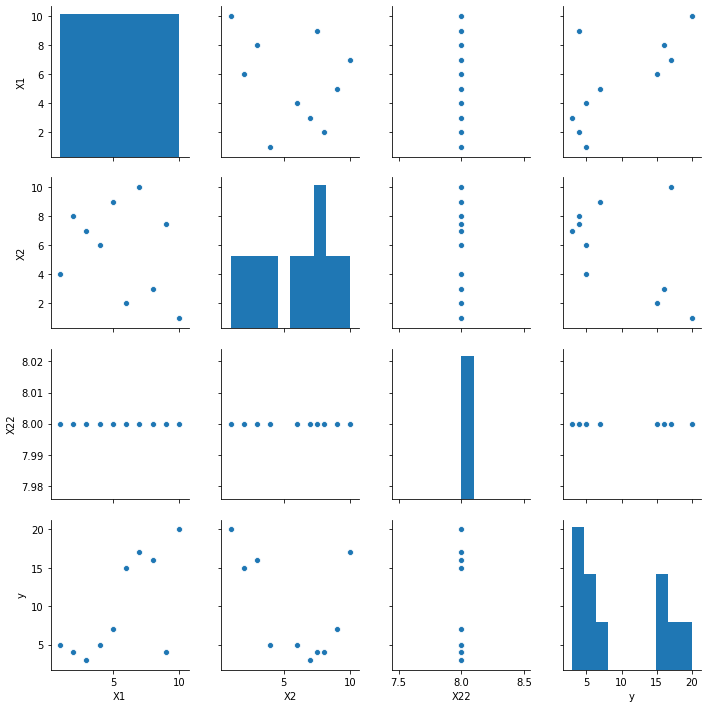

In [41]:
sns.pairplot(data = newdf, kind = 'scatter')

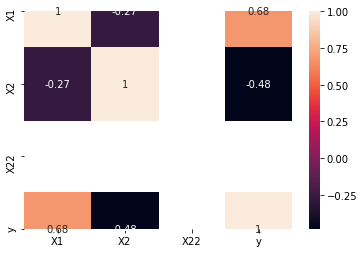

In [42]:
sns.heatmap(newdf.corr(method = 'pearson'), annot = True)

In [45]:
newX_train = newdf[['X1', 'X2', 'X22']]
newX_train

,X1,X2,X22
0,1,4.0,8.0
1,2,8.0,8.0
2,3,7.0,8.0
3,4,6.0,8.0
4,5,9.0,8.0
5,6,2.0,8.0
6,7,10.0,8.0
7,8,3.0,8.0
8,9,7.5,8.0
9,10,1.0,8.0


In [47]:
newy_train = newdf[['y']]
newy_train

,y
0,5
1,4
2,3
3,5
4,7
5,15
6,17
7,16
8,4
9,20


In [48]:
lr.fit(newX_train, newy_train)
print(lr.intercept_)
print(lr.coef_)

[6.44449706]
[[ 1.28988773 -0.68502253  0.        ]]
